# Imports

In [2]:
import theano
import theano.tensor as tt
import numpy as np
from typing import List, Tuple
from privugger.attacker import simulate, SimulationMetrics
from privugger.attacker.generators import IntGenerator
import pymc3 as pm
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import special

# The non-dp PPM

In [3]:
def PPM(data : List[Tuple[int,float, int, int]]) -> float :
    # Take only data of people with a disease
    data = list(filter(lambda x: x[-1], data))
    # fetch height
    data = list(map(lambda x: x[1], data))
    # average
    return (sum(data)/len(data))

In [ ]:
#trace = simulate(PPM, max_examples=20, num_samples=10_000, ranges=[(0,120),(0,300), (0,10), (0,10)], logging=False)
#trace.save_to_file()

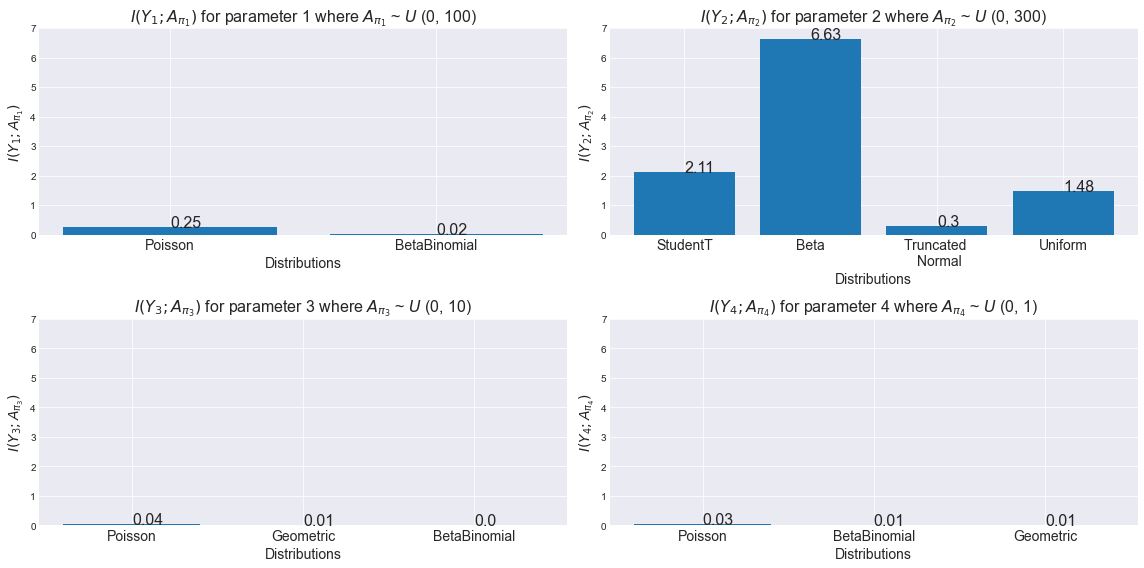

In [5]:
trace = SimulationMetrics("metrics-2020-12-04-02-44-02.priv")
trace.plot_mutual_information()

In [6]:
trace.I

[{'Poisson': [(0.2517690292698793, ['Poisson', 0.0]),
   (0.25176824674487275, ['Poisson', 0.0]),
   (0.25177074637513197, ['Poisson', 0.0]),
   (0.2517682602878626, ['Poisson', 0.0]),
   (0.25176890462622215, ['Poisson', 0.0]),
   (0.2517700905136717, ['Poisson', 0.0]),
   (0.2517678721980561, ['Poisson', 0.0]),
   (0.2517699003445433, ['Poisson', 0.0]),
   (0.251769215541378, ['Poisson', 0.0]),
   (0.25176802000856746, ['Poisson', 0.0])],
  'BetaBinomial': [(0.024799327745437694,
    ['BetaBinomial', 1780, 8632.0, 8392.0]),
   (0, ['BetaBinomial', 1514, 9096.0, 4136.0]),
   (0.019637850979895788, ['BetaBinomial', 1514, 9096.0, 4136.0]),
   (0.02086551076914933, ['BetaBinomial', 1514, 9096.0, 4136.0]),
   (0.0005056193414763044, ['BetaBinomial', 1514, 9096.0, 4136.0]),
   (0.0003795031619882039, ['BetaBinomial', 1514, 9096.0, 4136.0]),
   (0.014291120733113338, ['BetaBinomial', 1514, 9096.0, 4136.0]),
   (0.006767800582443861, ['BetaBinomial', 2773, 284.5, 2994.0]),
   (0, ['BetaBinom

# The dp PPM

In [22]:
def PPM_DP(data : List[Tuple[int,float, int, int]]) -> float :
    #Laplace noise:
    alpha=100/len(data)
    epsilon=1
    b = alpha/epsilon
    laplace_noise = pm.Laplace("laplace_noise",mu=0,b=b)

    # Take only data of people with a disease
    data = list(filter(lambda x: x[-1], data))
    # fetch height
    data = list(map(lambda x: x[1], data))
    # average
    return (sum(data)/len(data))+laplace_noise

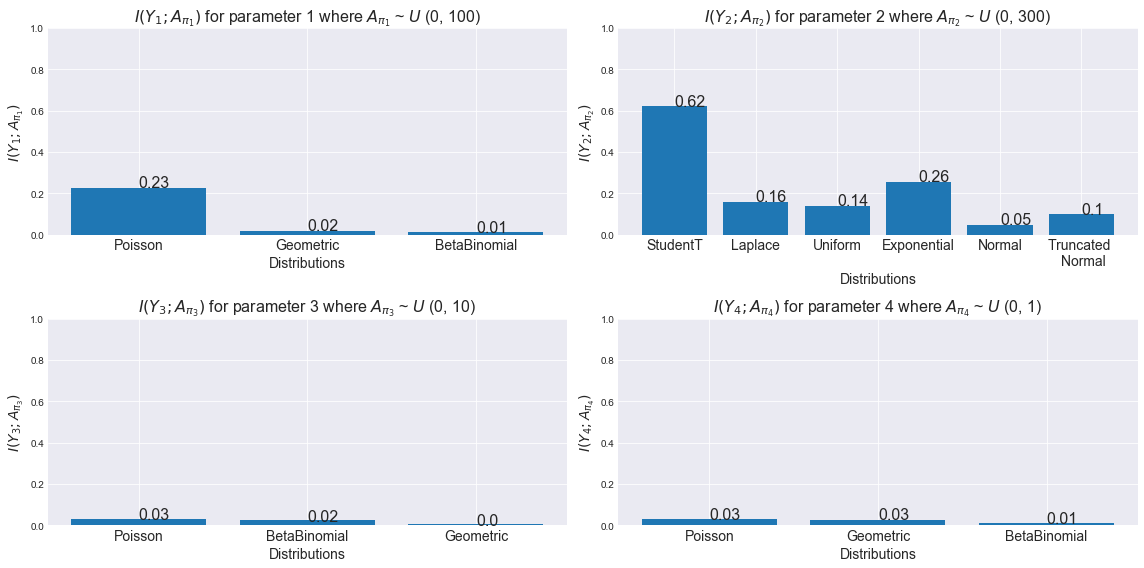

In [23]:
#trace = simulate(PPM, max_examples=20, num_samples=10_000, ranges=[(0,120),(0,300), (0,10), (0,10)], logging=False)
#trace.save_to_file()
trace2 = SimulationMetrics("metrics-2020-12-08-04-09-54.priv")
trace2.plot_mutual_information()

In [24]:
trace2.I

[{'Poisson': [(0.22684222182280145, ['Poisson', 0.0]),
   (0.22684148609288002, ['Poisson', 0.0]),
   (0.2268418781324515, ['Poisson', 0.0]),
   (0.2268387879807232, ['Poisson', 0.0]),
   (0.22683933854518568, ['Poisson', 0.0]),
   (0.22684162345551684, ['Poisson', 0.0]),
   (0.2268391432581467, ['Poisson', 0.0]),
   (0.22683886118294438, ['Poisson', 0.0]),
   (0.22684143606373297, ['Poisson', 0.0]),
   (0.22684137390218506, ['Poisson', 0.0])],
  'Geometric': [(0.013743756344767988, ['Geometric', 0.59765625]),
   (0.007215374388354512, ['Geometric', 0.3291015625]),
   (0.018305191234554208, ['Geometric', 0.3291015625]),
   (0.015696007500937803, ['Geometric', 0.98486328125]),
   (0.015693255714774423, ['Geometric', 0.98486328125]),
   (0, ['Geometric', 0.98486328125])],
  'BetaBinomial': [(0.007477843778853632,
    ['BetaBinomial', 7173, 8448.0, 4952.0]),
   (0.0009339109858848005, ['BetaBinomial', 7173, 7376.0, 4952.0]),
   (0.008992469270999948, ['BetaBinomial', 992, 7376.0, 4952.0])

# Graphs used in the report

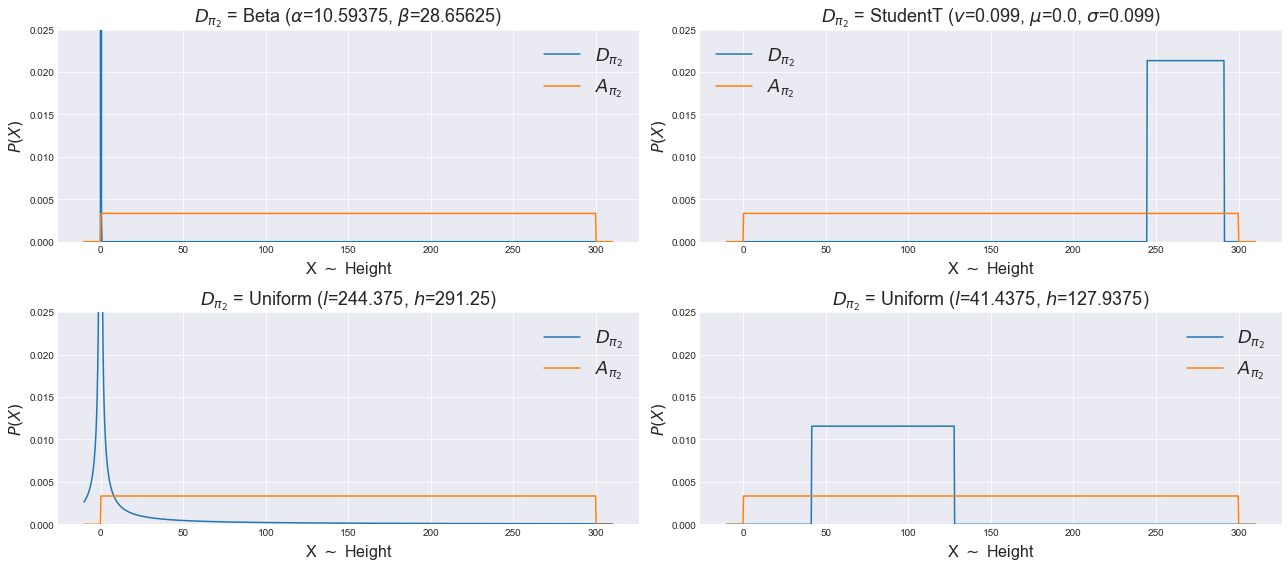

In [7]:
plt.style.use('seaborn-darkgrid')
samples = 1000
x = np.linspace(-10,310,samples)

alice = np.zeros(samples)
alice[(x >= 0) & (x <= 300)] = 1/300

y1 = st.beta.pdf(x, 10.59375, 28.65625)

y2 = st.t.pdf(x, 0.099, loc=0, scale=0.099)
not_useful = y2[x<0]
x_not_useful = x[x<0]

y3 = np.zeros(samples)
y3[(x >= 244.375) & (x <= 291.25)] = 1/(291.25-244.375)

y4 = np.zeros(samples)
y4[(x >= 41.4375) & (x <= 127.9375)] = 1/(127.9375-41.4375)


fig, ax = plt.subplots(2,2, figsize=(18,8))
ax[0][0].plot(x,y1, label="$D_{\pi_2}$")
ax[0][0].plot(x, alice, label="$A_{\pi_2}$")

ax[1][0].plot(x, y2, label="$D_{\pi_2}$")
ax[1][0].plot(x, alice, label="$A_{\pi_2}$")

ax[0][1].plot(x,y3, label="$D_{\pi_2}$")
ax[0][1].plot(x, alice, label="$A_{\pi_2}$")

ax[1][1].plot(x, y4, label="$D_{\pi_2}$")
ax[1][1].plot(x, alice, label="$A_{\pi_2}$")

titles = [r"$D_{\pi_2}$ = Beta ($\alpha$=10.59375, $\beta$=28.65625)", r"$D_{\pi_2}$ = StudentT ($v$=0.099, $\mu$=0.0, $\sigma$=0.099)", r"$D_{\pi_2}$ = Uniform ($l$=244.375, $h$=291.25)", r"$D_{\pi_2}$ = Uniform ($l$=41.4375, $h$=127.9375)"]

for a, t in zip(ax.flatten(), titles):
    a.set_ylim(0,0.025)
    a.set_xlabel("X $\sim$ Height", fontsize=16)
    a.set_ylabel("$P(X)$", fontsize=16)
    a.set_title(t, fontsize=18)
    a.legend(prop={"size":18})
plt.tight_layout()
plt.show()

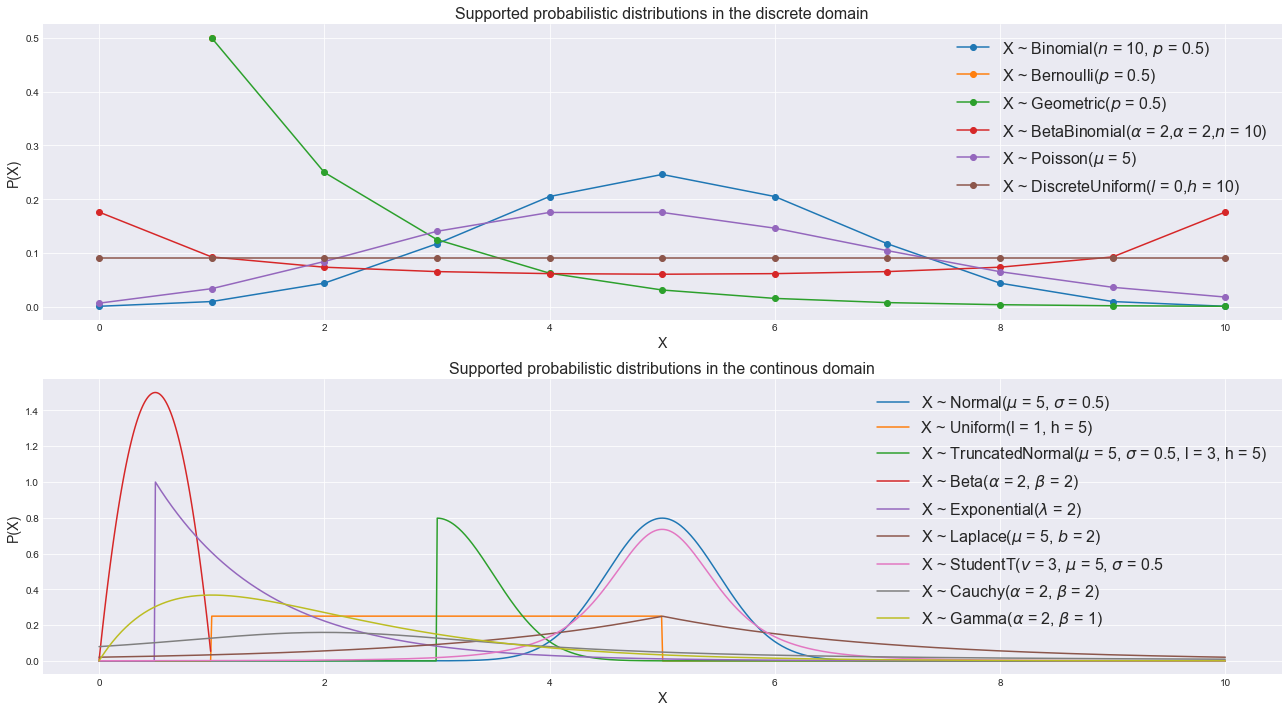

In [14]:
def BetaBinom(a, b, n, x):
    pmf = special.binom(n, x) * (special.beta(x+a, n-x+b) / special.beta(a, b))
    return pmf

plt.style.use('seaborn-darkgrid')

_, ax = plt.subplots(2,1,figsize=(18,10))

x = np.linspace(0,10,11)

#Discrete domain:
y1 = st.binom.pmf(x, 10, 0.5)
y2 = st.bernoulli.pmf(x, 0.5)
y3 = st.geom.pmf(x[1:], 0.5)
y4 = BetaBinom(0.5,0.5,10,x)
y5 = st.poisson.pmf(x, 5)
y6 = np.linspace(1/len(x), 1/len(x), len(x))

ax[0].plot(x,y1, "-o", label=r"X ~ Binomial($n$ = 10, $p$ = 0.5)")
ax[0].plot(x[1:2],y2[1:2], "-o", label=r"X ~ Bernoulli($p$ = 0.5)")
ax[0].plot(x[1:],y3, "-o", label=r"X ~ Geometric($p$ = 0.5)")
ax[0].plot(x,y4, "-o", label=r"X ~ BetaBinomial($\alpha$ = 2,$\alpha$ = 2,$n$ = 10)")
ax[0].plot(x,y5, "-o", label=r"X ~ Poisson($\mu$ = 5)")
ax[0].plot(x,y6, "-o", label=r"X ~ DiscreteUniform($l$ = 0,$h$ = 10)")
ax[0].legend(loc=1, prop={"size":16})

#Continous domain
x = np.linspace(0,10,1000)
y7 = st.norm.pdf(x, 5, 0.5)
y8 = np.zeros(1000)
y8[(x<5) & (x>1)] = 1/4
y9 = np.zeros(1000)
y9[(x<5) & (x>3)] = st.norm.pdf(x,3,0.5)[300:500]
y10 = st.beta.pdf(x[0:100], 2,2)
y11 = st.expon.pdf(x, 1/2)
y12 = st.laplace.pdf(x, 5, 2)
y13 = st.t.pdf(x, 3, loc=5, scale=0.5)
y14 = st.cauchy.pdf(x, loc=2, scale=2)
y15 = st.gamma.pdf(x, 2, scale=1.0/1)

ax[1].plot(x,y7, label=r"X ~ Normal($\mu$ = 5, $\sigma$ = 0.5)")
ax[1].plot(x,y8, label=r"X ~ Uniform(l = 1, h = 5)")
ax[1].plot(x,y9, label=r"X ~ TruncatedNormal($\mu$ = 5, $\sigma$ = 0.5, l = 3, h = 5)")
ax[1].plot(x[0:100], y10, label=r"X ~ Beta($\alpha$ = 2, $\beta$ = 2)")
ax[1].plot(x, y11, label=r"X ~ Exponential($\lambda$ = 2)")
ax[1].plot(x, y12, label=r"X ~ Laplace($\mu$ = 5, $b$ = 2)")
ax[1].plot(x,y13, label=r"X ~ StudentT($v$ = 3, $\mu$ = 5, $\sigma$ = 0.5")
ax[1].plot(x,y14, label=r"X ~ Cauchy($\alpha$ = 2, $\beta$ = 2)")
ax[1].plot(x,y15, label=r"X ~ Gamma($\alpha$ = 2, $\beta$ = 1)")
ax[1].legend(loc=1, prop={"size":16})

ax[0].set_title("Supported probabilistic distributions in the discrete domain", fontsize=16)
ax[0].set_ylabel("P(X)",fontsize=14)
ax[0].set_xlabel("X",fontsize=14)
ax[1].set_title("Supported probabilistic distributions in the continous domain", fontsize=16)
ax[1].set_ylabel("P(X)",fontsize=14)
ax[1].set_xlabel("X",fontsize=14)
plt.tight_layout()
plt.show()

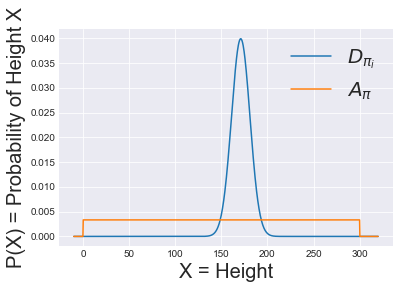

In [15]:
plt.style.use('seaborn-darkgrid')
x = np.linspace(-10, 320, 1000)
mu = 171
sigma = [10]
pdf = st.norm.pdf(x, mu, sigma)
y = np.zeros(1000)
l = 0.0
u = 300
y[(x<u) & (x>l)] = 1.0/(u-l)
plt.plot(x, pdf, label=r'$D_{\pi_i}$')
plt.plot(x, y, label="$A_{\pi}$")
plt.xlabel('X = Height', fontsize=20)
plt.ylabel('P(X) = Probability of Height X', fontsize=20)
plt.legend(loc=1, prop={"size":20})
plt.show()

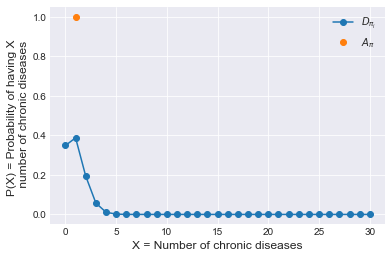

In [21]:
plt.style.use('seaborn-darkgrid')
x = np.arange(0, 31)
y = st.binom.pmf(x, 10, 0.1)
plt.plot(x,y,"-o", label=r'$D_{\pi_i}$')
plt.plot([1],[1],"o", label="$A_{\pi}$")
plt.xlabel('X = Number of chronic diseases', fontsize=12)
plt.ylabel('P(X) = Probability of having X \n number of chronic diseases', fontsize=12)
plt.legend(loc=1)
plt.show()